In [85]:
# Importing necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import yfinance as yf

In [86]:
# Loading the datasets

AAPL_data = pd.read_csv('AAPL_data.csv')
AMZN_data = pd.read_csv('AMZN_data.csv')
GOOG_data = pd.read_csv('GOOG_data.csv')
MSFT_data = pd.read_csv('MSFT_data.csv')

In [87]:
# Data Pre-processing and Cleaning

# Converting 'date' columns to datetime format
AAPL_data['date'] = pd.to_datetime(AAPL_data['date'])
AMZN_data['date'] = pd.to_datetime(AMZN_data['date'])
GOOG_data['date'] = pd.to_datetime(GOOG_data['date'])
MSFT_data['date'] = pd.to_datetime(MSFT_data['date'])

# Setting 'date' column as index
AAPL_data.set_index('date', inplace=True)
AMZN_data.set_index('date', inplace=True)
GOOG_data.set_index('date', inplace=True)
MSFT_data.set_index('date', inplace=True)

In [88]:
# Summarizing and Inspecting the Datasets

# For AAPL_data
print("===== AAPL_data Summary =====")
print(AAPL_data.info())
print(AAPL_data.describe())
print(AAPL_data.head())

# For AMZN_data
print("\n===== AMZN_data Summary =====")
print(AMZN_data.info())
print(AMZN_data.describe())
print(AMZN_data.head())

# For GOOG_data
print("\n===== GOOG_data Summary =====")
print(GOOG_data.info())
print(GOOG_data.describe())
print(GOOG_data.head())

# For MSFT_data
print("\n===== MSFT_data Summary =====")
print(MSFT_data.info())
print(MSFT_data.describe())
print(MSFT_data.head())


===== AAPL_data Summary =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB
None
              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    109.055429   109.951118   108.141589   109.066698  5.404790e+07
std      30.549220    30.686186    30.376224    30.556812  3.346835e+07
min      55.424200    57.085700    55.014200    55.789900  1.147592e+07
25%      84.647800    85.334950    84.250650    84.830650  2.969438e+07
50%     108.970000   110.030000   108.050000   109

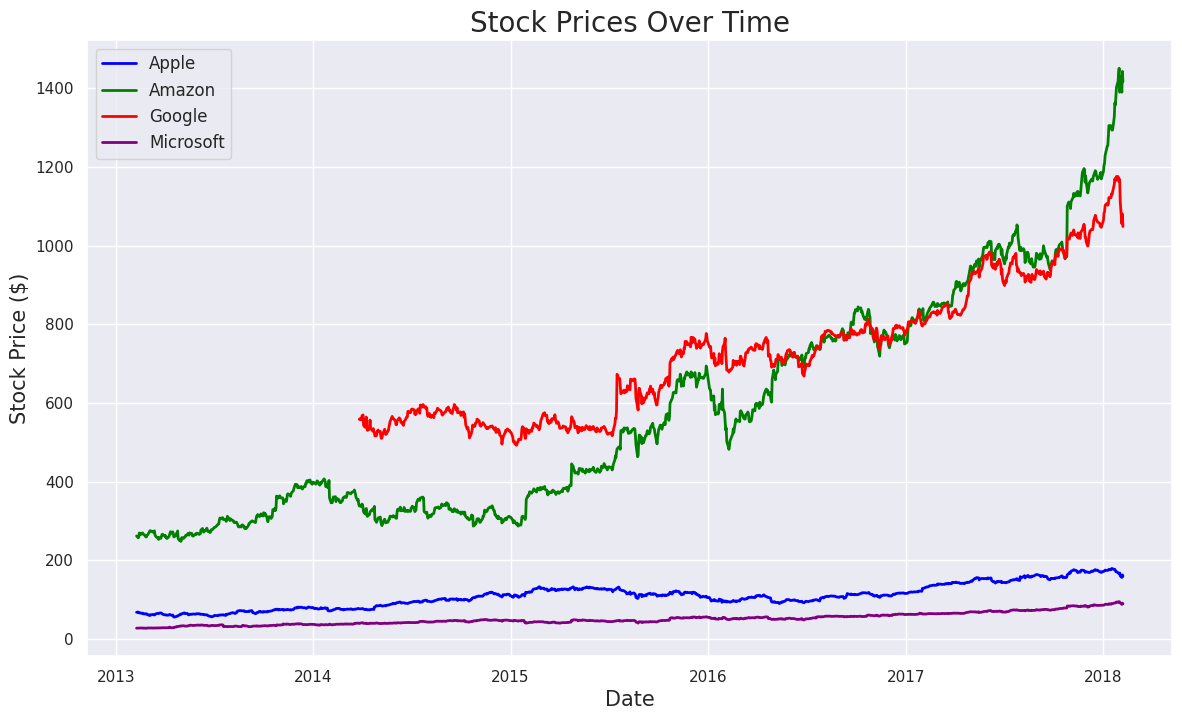

In [89]:
# Data Analysis - Visualizing Stock Prices

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a new figure and set its size
plt.figure(figsize=(14, 8))

# Plot data with different colors and line widths
plt.plot(AAPL_data['close'], label='Apple', color='blue', linewidth=2)
plt.plot(AMZN_data['close'], label='Amazon', color='green', linewidth=2)
plt.plot(GOOG_data['close'], label='Google', color='red', linewidth=2)
plt.plot(MSFT_data['close'], label='Microsoft', color='purple', linewidth=2)

# Set title and labels with larger font sizes
plt.title('Stock Prices Over Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price ($)', fontsize=15)

# Add a legend with a larger font size
plt.legend(fontsize=12)

# Show the plot
plt.show()



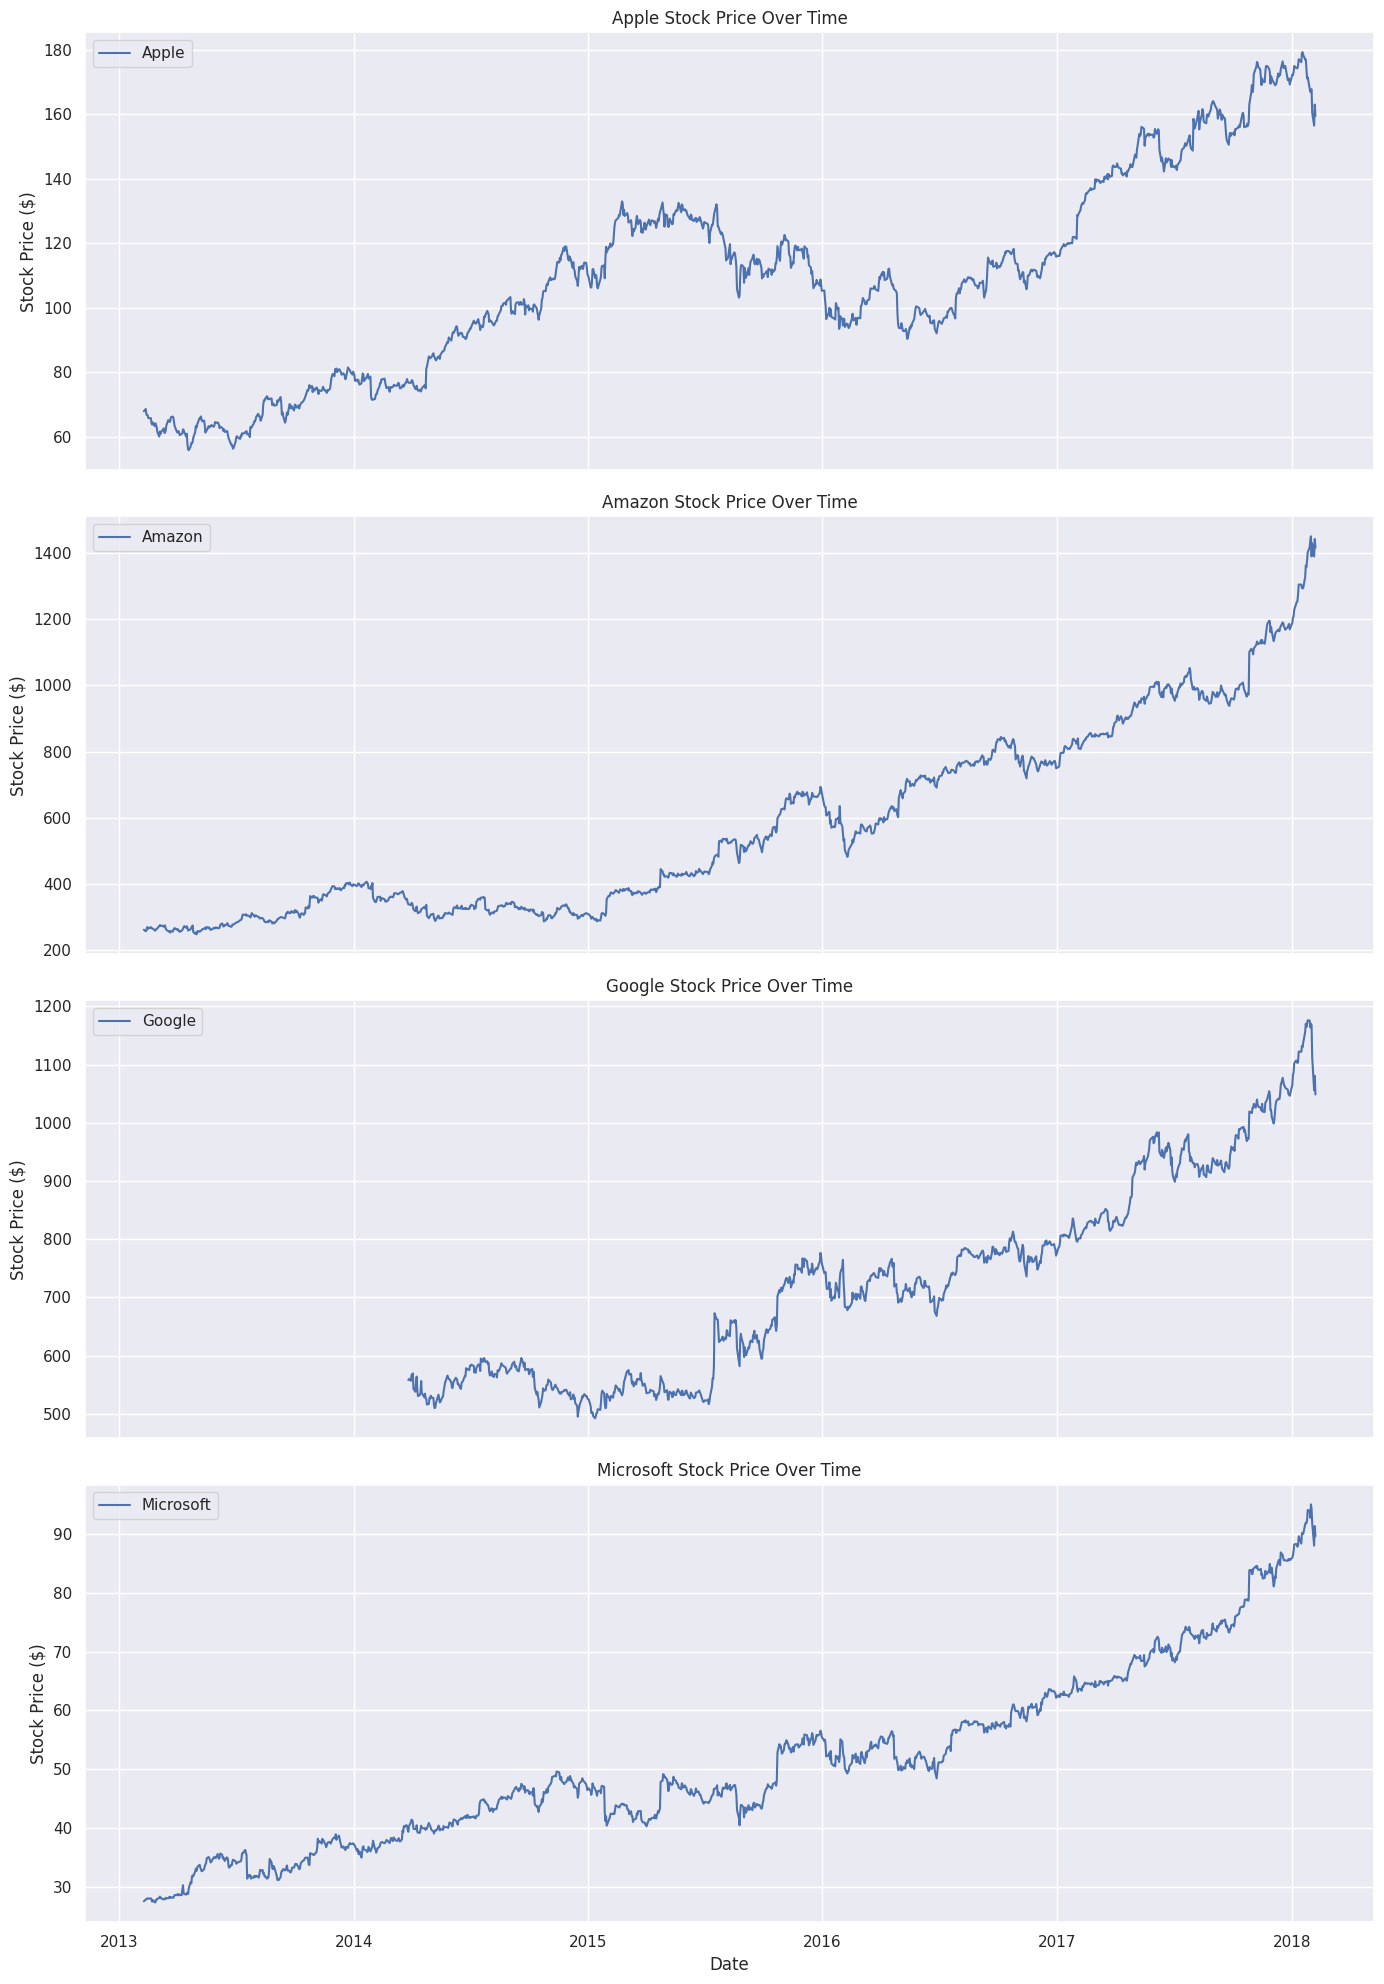

In [90]:
# creating a separate subplot for each stock's closing price over time

# Create a new figure and set its size
fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Create a list of stocks data and their names for easy iteration
stocks_data = [AAPL_data, AMZN_data, GOOG_data, MSFT_data]
stock_names = ["Apple", "Amazon", "Google", "Microsoft"]

for i, stock_data in enumerate(stocks_data):
    # Plot data
    axs[i].plot(stock_data['close'], label=stock_names[i])
    
    # Set title and labels
    axs[i].set_title(f'{stock_names[i]} Stock Price Over Time')
    axs[i].set_ylabel('Stock Price ($)')
    
    # Add gridlines
    axs[i].grid(True)
    
    # Add a legend
    axs[i].legend()

# Set the X-axis label on the last subplot
axs[-1].set_xlabel('Date')

# Adjust the layout to provide space
plt.tight_layout()

# Show the plot
plt.show()


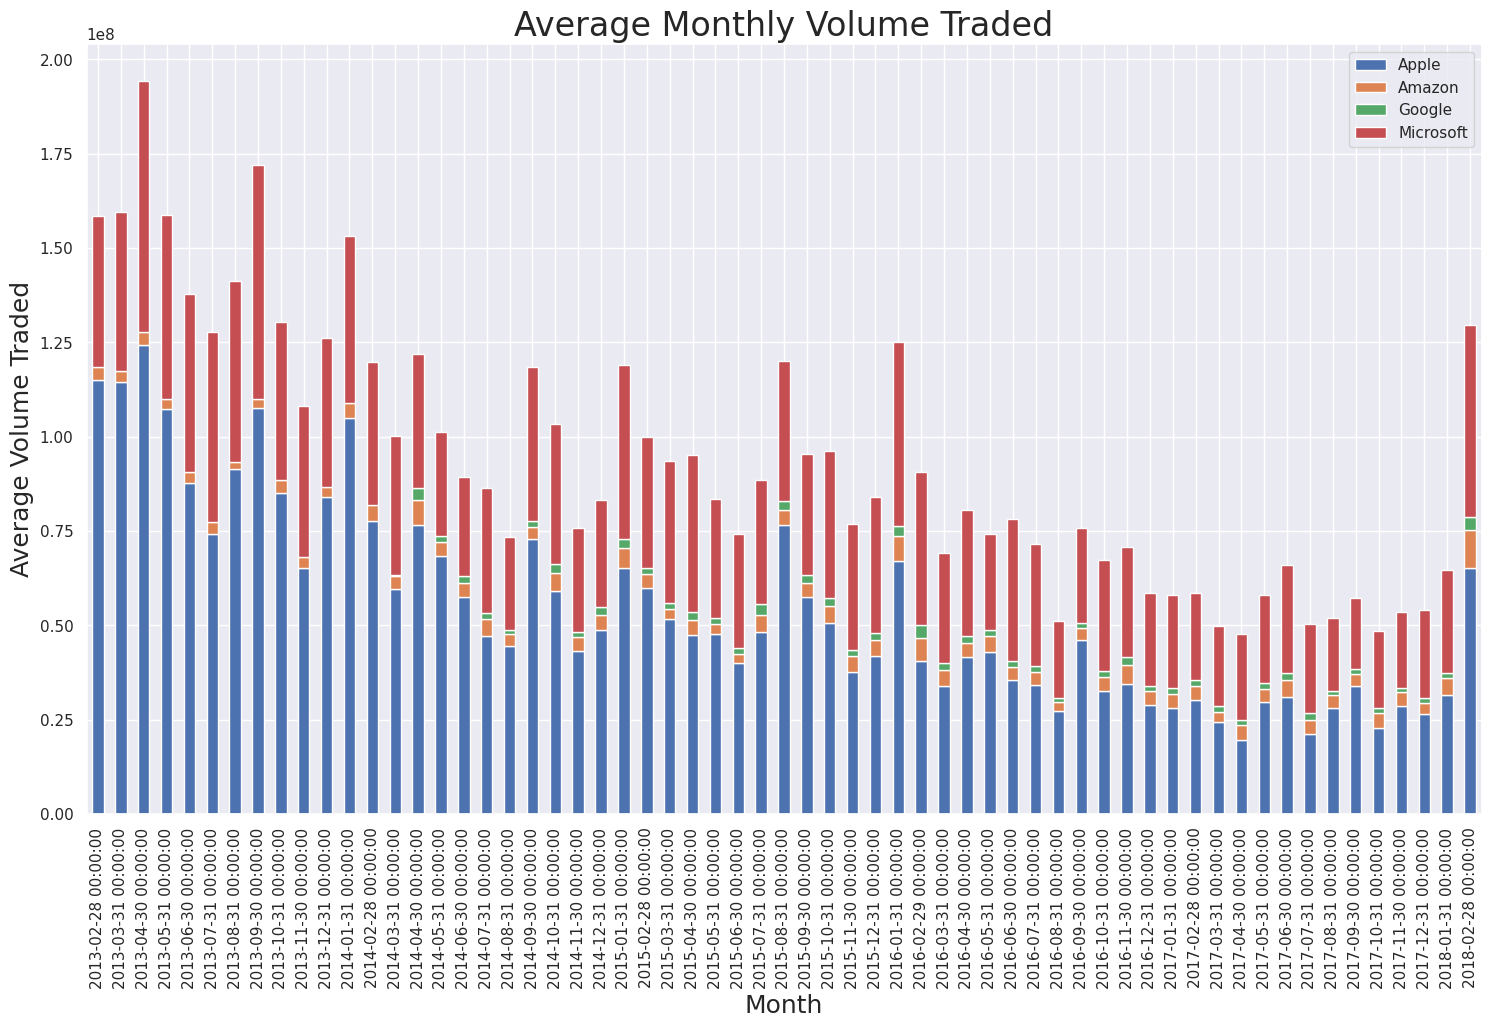

In [91]:
# Volume Traded Analysis

# Convert the index to datetime
AAPL_data.index = pd.to_datetime(AAPL_data.index)
AMZN_data.index = pd.to_datetime(AMZN_data.index)
GOOG_data.index = pd.to_datetime(GOOG_data.index)
MSFT_data.index = pd.to_datetime(MSFT_data.index)

# Resample and compute monthly averages
AAPL_monthly = AAPL_data['volume'].resample('M').mean()
AMZN_monthly = AMZN_data['volume'].resample('M').mean()
GOOG_monthly = GOOG_data['volume'].resample('M').mean()
MSFT_monthly = MSFT_data['volume'].resample('M').mean()

# Create a new DataFrame for monthly averages
monthly_data = pd.DataFrame({
    'Apple': AAPL_monthly,
    'Amazon': AMZN_monthly,
    'Google': GOOG_monthly,
    'Microsoft': MSFT_monthly
})

# Plot the data
monthly_data.plot(kind='bar', stacked=True, figsize=(18,10))

# Set title and labels
plt.title('Average Monthly Volume Traded', fontsize=24)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Volume Traded', fontsize=18)

# Show the plot
plt.show()

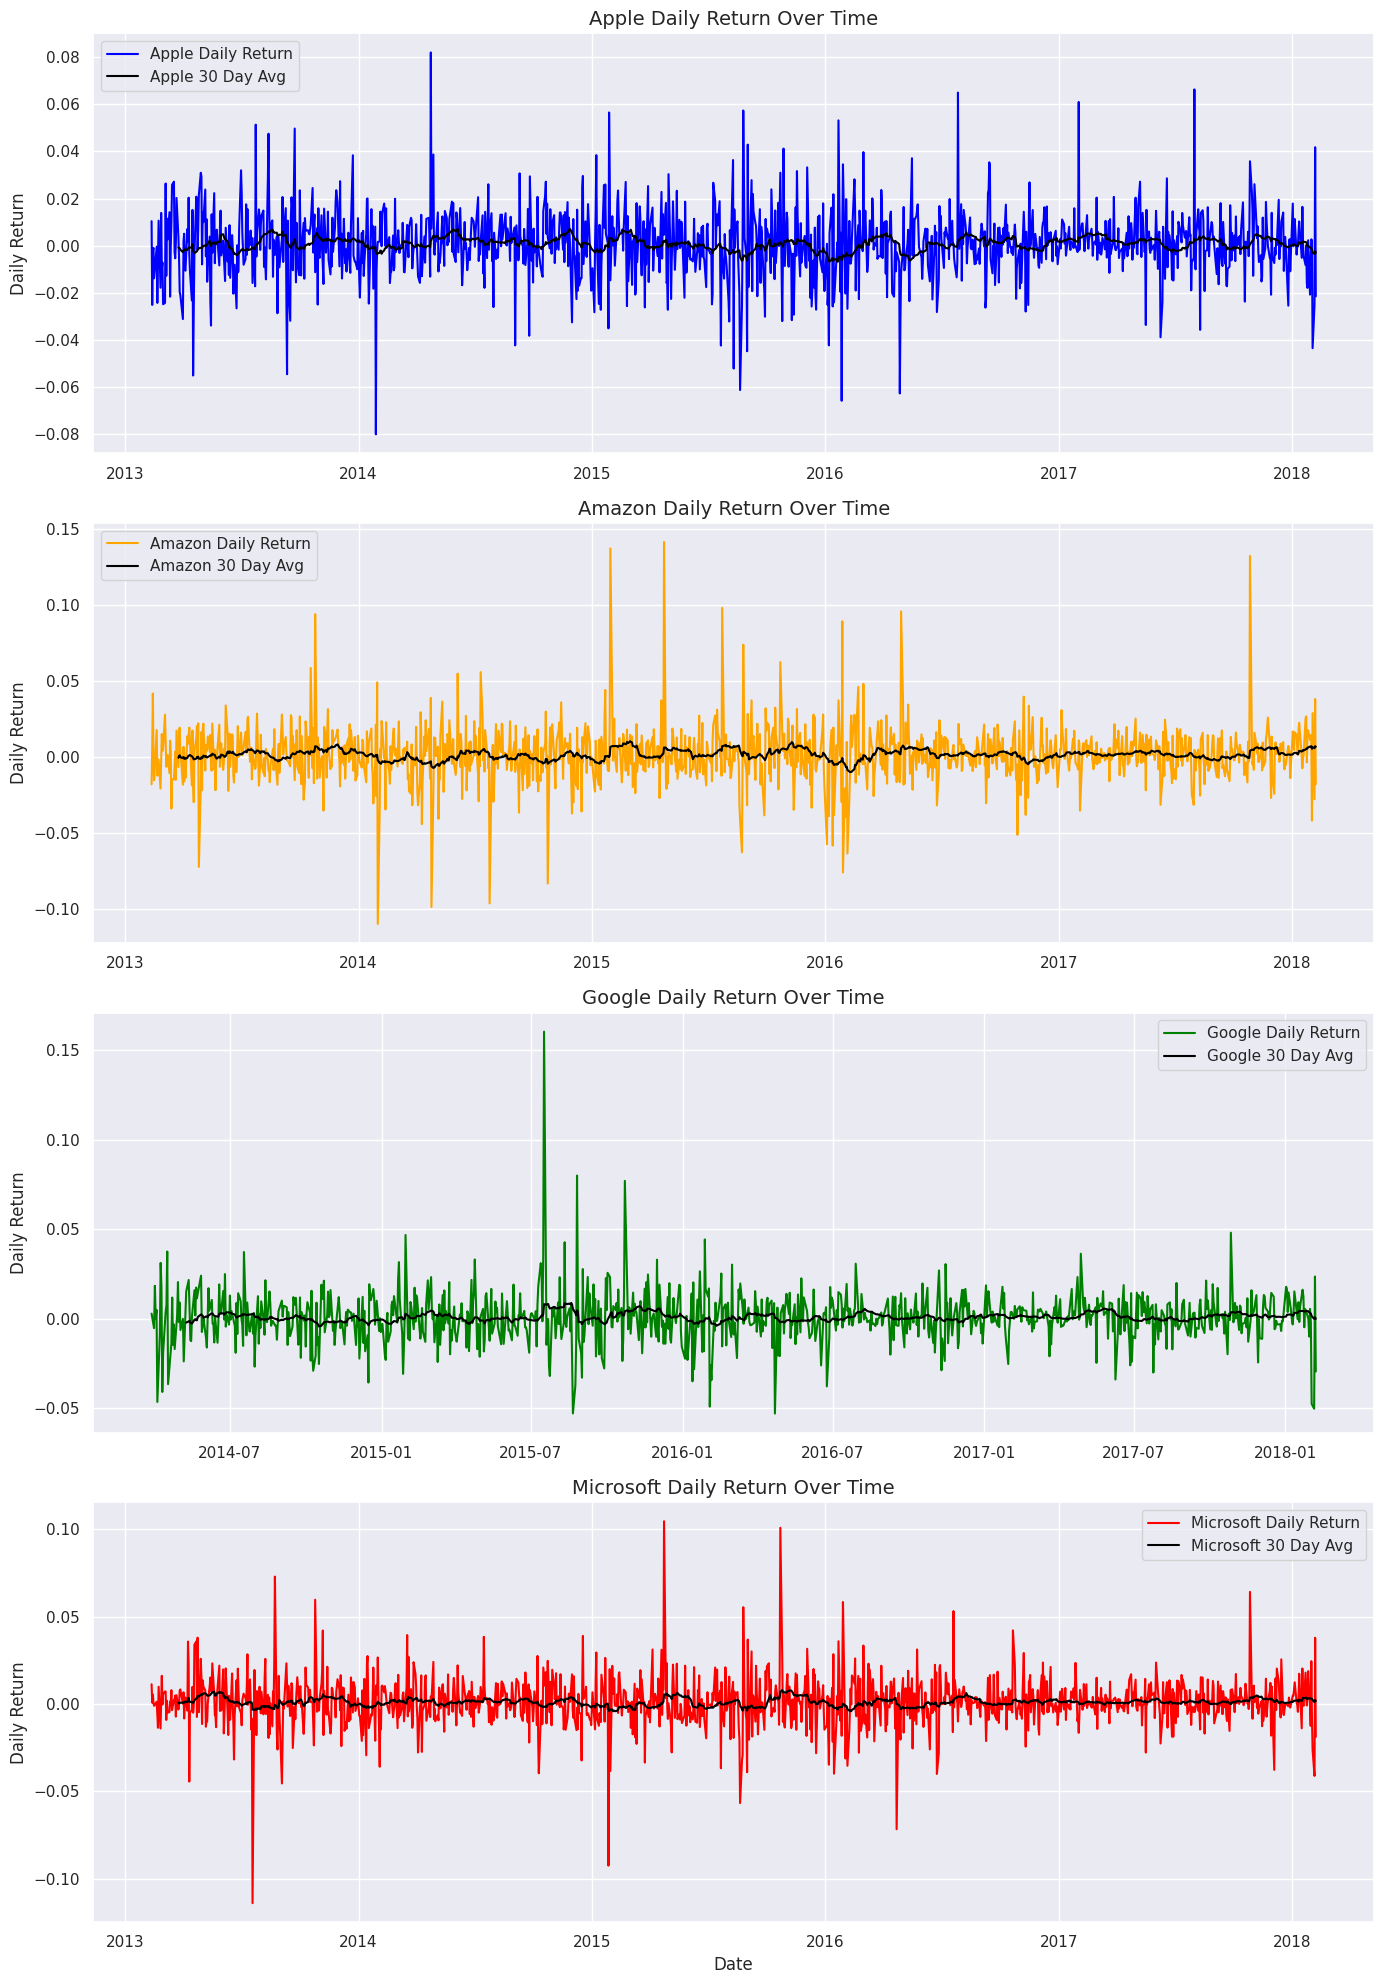

In [92]:
# Add 'daily_return' to each dataframe
AAPL_data['daily_return'] = AAPL_data['close'].pct_change()
AMZN_data['daily_return'] = AMZN_data['close'].pct_change()
GOOG_data['daily_return'] = GOOG_data['close'].pct_change()
MSFT_data['daily_return'] = MSFT_data['close'].pct_change()

# Analyzing Price Change

# Create a figure with 4 subplots, and set the size
fig, axs = plt.subplots(4, 1, figsize=(14, 20))

# A list of our dataframes and corresponding labels
dataframes = [(AAPL_data, 'Apple'), (AMZN_data, 'Amazon'), (GOOG_data, 'Google'), (MSFT_data, 'Microsoft')]

# Colors for each plot
colors = ['blue', 'orange', 'green', 'red']

for i, (data, label) in enumerate(dataframes):
    # Plot the daily returns
    axs[i].plot(data['daily_return'], label=f'{label} Daily Return', color=colors[i])
    
    # Plot a 30 day rolling average of the daily returns
    axs[i].plot(data['daily_return'].rolling(window=30).mean(), label=f'{label} 30 Day Avg', color='black')
    
    # Set the title and labels
    axs[i].set_title(f'{label} Daily Return Over Time', fontsize=14)
    axs[i].set_ylabel('Daily Return', fontsize=12)
    
    # Add a legend
    axs[i].legend()

# Set the x label for the whole figure
axs[3].set_xlabel('Date', fontsize=12)

# Display the figure
plt.tight_layout()
plt.show()


In [93]:
# Define the ticker symbols
tickerSymbols = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

# Initialize a dictionary to store the shares outstanding
shares_outstanding = {}

for tickerSymbol in tickerSymbols:
    # Get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)
    
    # Get the shares outstanding
    shares_outstanding[tickerSymbol] = tickerData.info['sharesOutstanding']

# Now, calculate market cap for each company

AAPL_data['market_cap'] = AAPL_data['close'] * shares_outstanding['AAPL']
AMZN_data['market_cap'] = AMZN_data['close'] * shares_outstanding['AMZN']
GOOG_data['market_cap'] = GOOG_data['close'] * shares_outstanding['GOOG']
MSFT_data['market_cap'] = MSFT_data['close'] * shares_outstanding['MSFT']


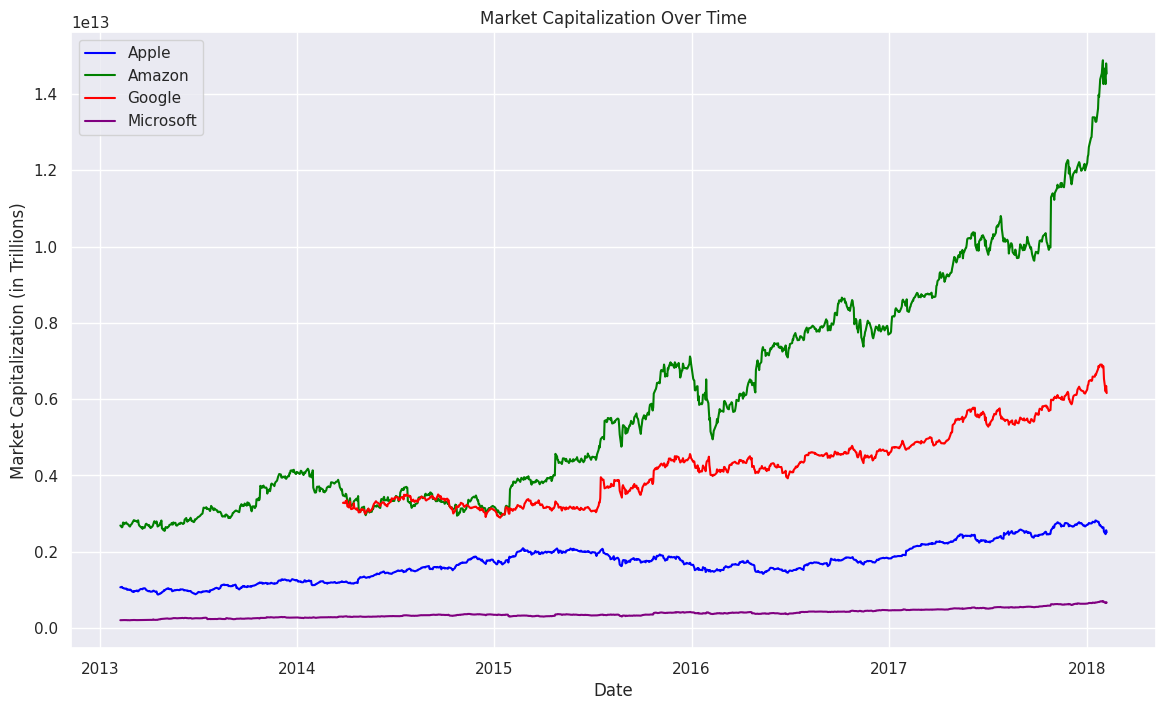

In [94]:
# Creating a new figure and set its size
plt.figure(figsize=(14, 8))

# Plot data
plt.plot(AAPL_data.index, AAPL_data['market_cap'], label='Apple', color='blue')
plt.plot(AMZN_data.index, AMZN_data['market_cap'], label='Amazon', color='green')
plt.plot(GOOG_data.index, GOOG_data['market_cap'], label='Google', color='red')
plt.plot(MSFT_data.index, MSFT_data['market_cap'], label='Microsoft', color='purple')

# Set title and labels
plt.title('Market Capitalization Over Time')
plt.xlabel('Date')
plt.ylabel('Market Capitalization (in Trillions)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [95]:
# 1. Comparing the Market Capitalization:

# Calculate total market cap
total_market_cap = AAPL_data['market_cap'].iloc[-1] + AMZN_data['market_cap'].iloc[-1] + GOOG_data['market_cap'].iloc[-1] + MSFT_data['market_cap'].iloc[-1]

# Calculate market cap share
AAPL_share = AAPL_data['market_cap'].iloc[-1] / total_market_cap
AMZN_share = AMZN_data['market_cap'].iloc[-1] / total_market_cap
GOOG_share = GOOG_data['market_cap'].iloc[-1] / total_market_cap
MSFT_share = MSFT_data['market_cap'].iloc[-1] / total_market_cap

# Print shares
print("Apple's market cap share:", AAPL_share)
print("Amazon's market cap share:", AMZN_share)
print("Google's market cap share:", GOOG_share)
print("Microsoft's market cap share:", MSFT_share)


Apple's market cap share: 0.1051183075939647
Amazon's market cap share: 0.6089514189924222
Google's market cap share: 0.2580188496179872
Microsoft's market cap share: 0.027911423795625657


In [96]:
# 2. Growth of Market Capitalization:

# Calculate growth
AAPL_growth = (AAPL_data['market_cap'].iloc[-1] / AAPL_data['market_cap'].iloc[0]) - 1
AMZN_growth = (AMZN_data['market_cap'].iloc[-1] / AMZN_data['market_cap'].iloc[0]) - 1
GOOG_growth = (GOOG_data['market_cap'].iloc[-1] / GOOG_data['market_cap'].iloc[0]) - 1
MSFT_growth = (MSFT_data['market_cap'].iloc[-1] / MSFT_data['market_cap'].iloc[0]) - 1

# Print growth rates
print("Apple's market cap growth:", AAPL_growth)
print("Amazon's market cap growth:", AMZN_growth)
print("Google's market cap growth:", GOOG_growth)
print("Microsoft's market cap growth:", MSFT_growth)


Apple's market cap growth: 1.3512177580754021
Amazon's market cap growth: 4.408589425462874
Google's market cap growth: 0.8776277620599504
Microsoft's market cap growth: 2.2526315789473683


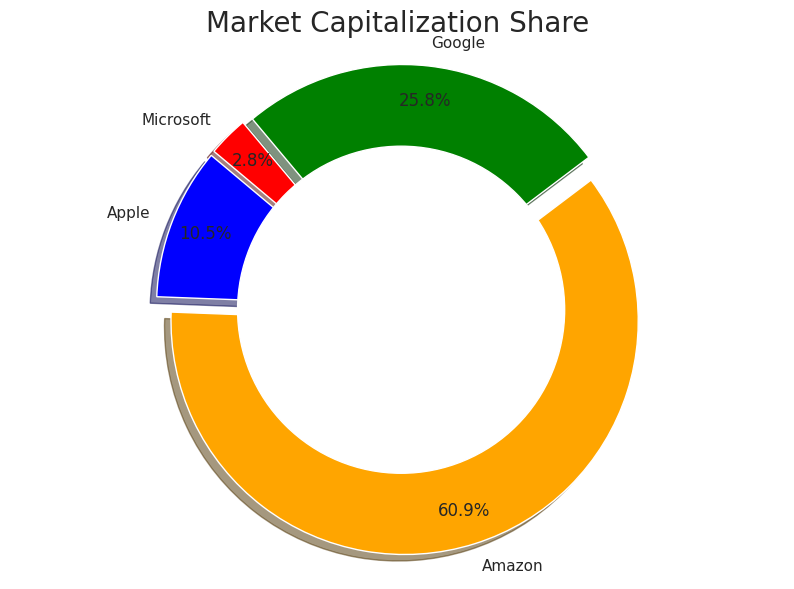

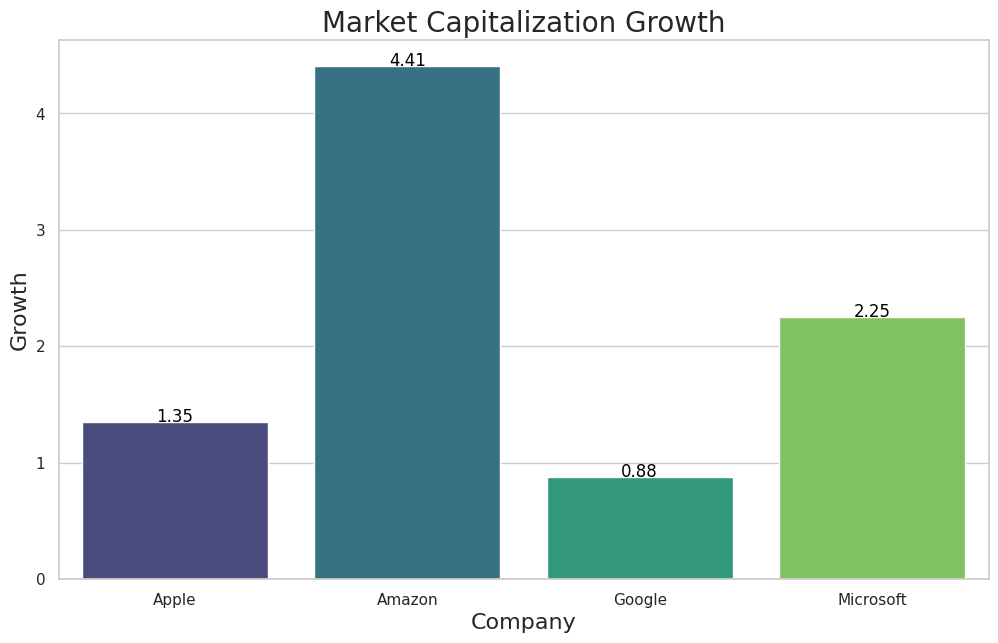

In [97]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

# Market cap shares
market_caps = [0.1051183075939647, 0.6089514189924222, 0.2580188496179872, 0.027911423795625657]
labels = ['Apple', 'Amazon', 'Google', 'Microsoft']
colors = ['blue', 'orange', 'green', 'red']
explode = (0.05, 0.05, 0.05, 0.05)  # explode a slice if required

plt.figure(figsize=(10, 7))
plt.pie(market_caps, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, pctdistance=0.85, shadow=True)

#draw white circle in the middle for a doughnut styled pie chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Market Capitalization Share', fontsize=20)
plt.show()

# Market cap growth
market_cap_growth = [1.3512177580754021, 4.408589425462874, 0.8776277620599504, 2.2526315789473683]
companies = ['Apple', 'Amazon', 'Google', 'Microsoft']

plt.figure(figsize=(12, 7))
bars = sns.barplot(x=companies, y=market_cap_growth, palette="viridis")

# Adding value labels on top of the bars
for idx, val in enumerate(market_cap_growth):
    bars.text(idx, val, round(val, 2), color='black', ha="center")

plt.title('Market Capitalization Growth', fontsize=20)
plt.xlabel('Company', fontsize=16)
plt.ylabel('Growth', fontsize=16)
plt.show()


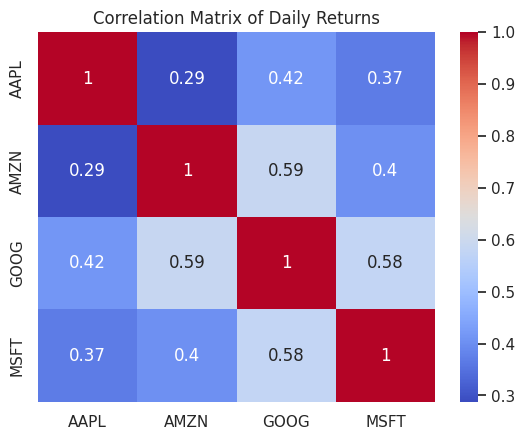

In [98]:
# Combining the 'daily_return' columns of the four dataframes into a new dataframe
daily_returns = pd.DataFrame({
    'AAPL': AAPL_data['daily_return'],
    'AMZN': AMZN_data['daily_return'],
    'GOOG': GOOG_data['daily_return'],
    'MSFT': MSFT_data['daily_return'],
})

# Computing the correlation matrix of the daily returns
corr_matrix = daily_returns.corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()



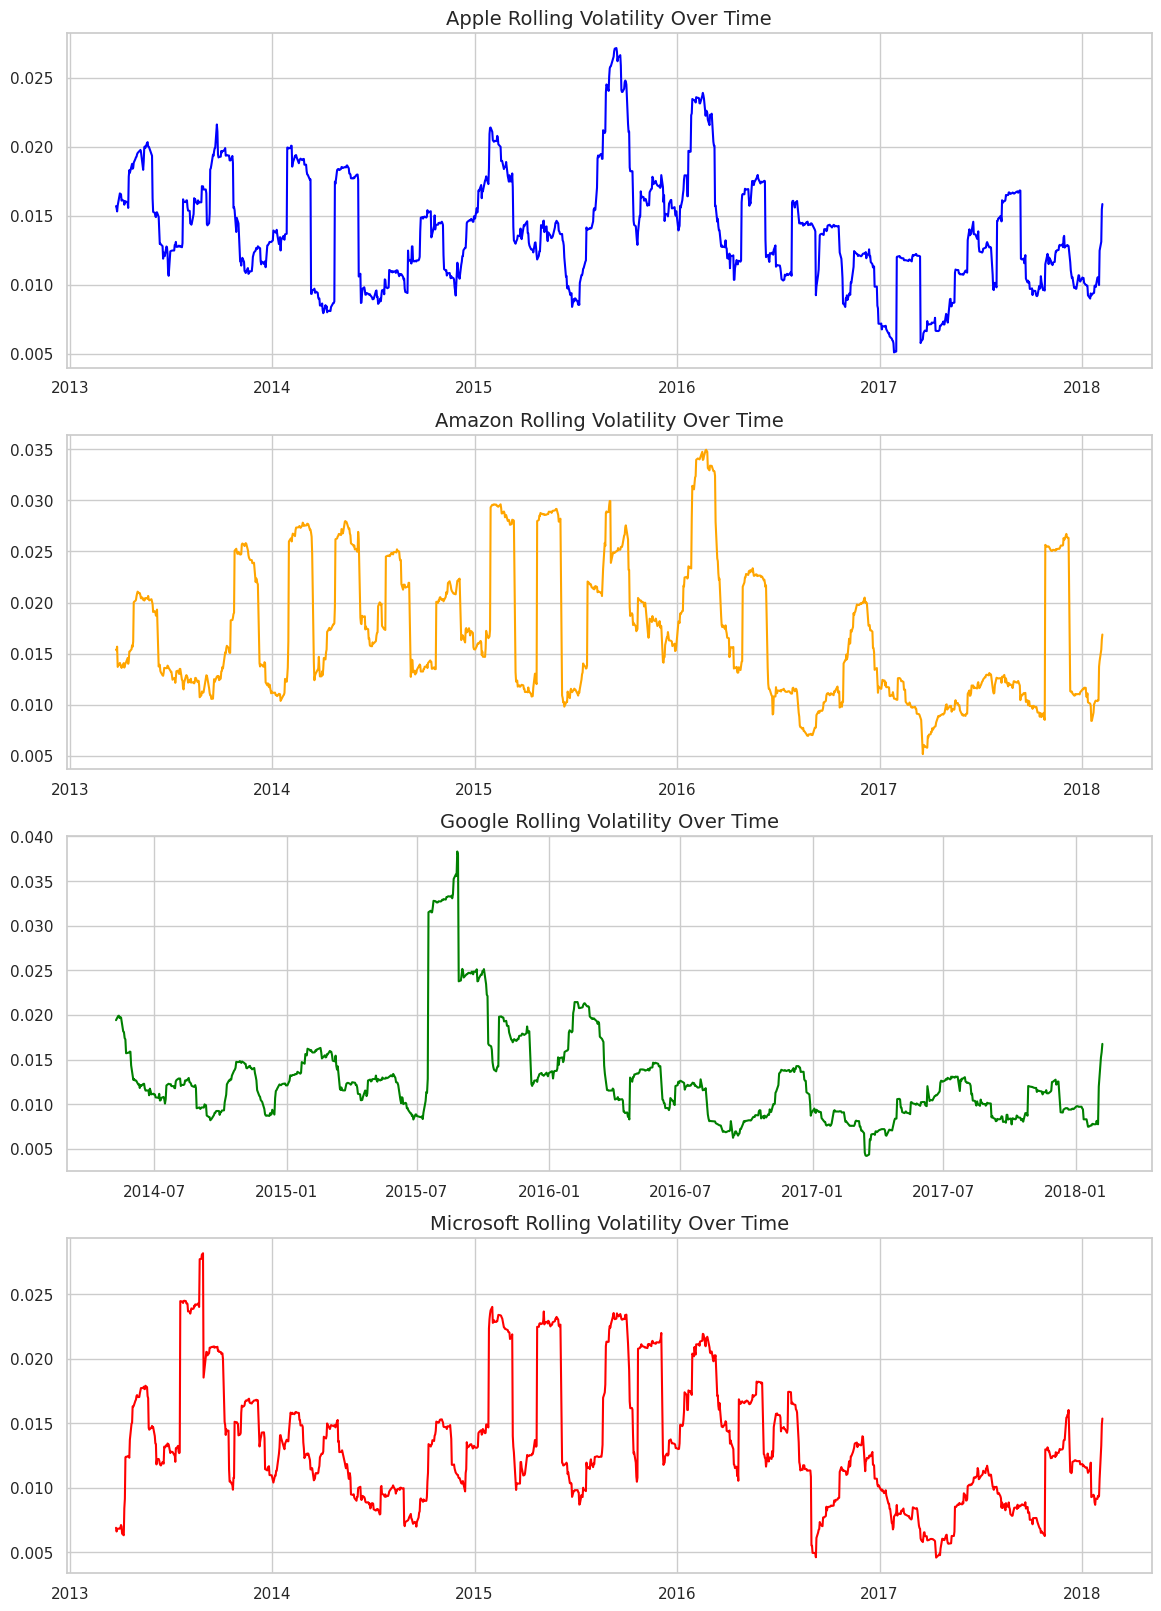

In [99]:
# Computing the rolling volatility
AAPL_data['rolling_volatility'] = AAPL_data['daily_return'].rolling(window=30).std()
AMZN_data['rolling_volatility'] = AMZN_data['daily_return'].rolling(window=30).std()
GOOG_data['rolling_volatility'] = GOOG_data['daily_return'].rolling(window=30).std()
MSFT_data['rolling_volatility'] = MSFT_data['daily_return'].rolling(window=30).std()

# Visualizing the rolling volatility
fig, axs = plt.subplots(4, 1, figsize=(14, 20))
dataframes = [(AAPL_data, 'Apple'), (AMZN_data, 'Amazon'), (GOOG_data, 'Google'), (MSFT_data, 'Microsoft')]
colors = ['blue', 'orange', 'green', 'red']
for i, (data, label) in enumerate(dataframes):
    axs[i].plot(data['rolling_volatility'], label=f'{label} Rolling Volatility', color=colors[i])
    axs[i].set_title(f'{label} Rolling Volatility Over Time', fontsize=14)
    axs[i].set


In [100]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Preparing the data for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Loading the dataset
dataframe = AAPL_data['close'].values
dataframe = dataframe.astype('float32')

# Normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe.reshape(-1, 1))

# Spliting into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshaping into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshapeing input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Defining the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculating the future prediction (here, 30 days into the future)
future_days = 30
futurePredict = []
currentStep = testPredict[-look_back:]

for i in range(future_days):
    currentPredict = model.predict(currentStep.reshape(1, 1, look_back))
    futurePredict.append(scaler.inverse_transform(currentPredict))
    currentStep = np.append(currentStep[1:,:], currentPredict, axis=0)

print("The future price prediction is:", futurePredict)


Epoch 1/100
839/839 - 2s - loss: 0.0132 - 2s/epoch - 3ms/step
Epoch 2/100
839/839 - 1s - loss: 0.0047 - 952ms/epoch - 1ms/step
Epoch 3/100
839/839 - 1s - loss: 0.0045 - 979ms/epoch - 1ms/step
Epoch 4/100
839/839 - 1s - loss: 0.0034 - 968ms/epoch - 1ms/step
Epoch 5/100
839/839 - 1s - loss: 0.0027 - 960ms/epoch - 1ms/step
Epoch 6/100
839/839 - 1s - loss: 0.0029 - 982ms/epoch - 1ms/step
Epoch 7/100
839/839 - 1s - loss: 0.0026 - 930ms/epoch - 1ms/step
Epoch 8/100
839/839 - 1s - loss: 0.0023 - 949ms/epoch - 1ms/step
Epoch 9/100
839/839 - 1s - loss: 0.0025 - 941ms/epoch - 1ms/step
Epoch 10/100
839/839 - 1s - loss: 0.0020 - 1s/epoch - 1ms/step
Epoch 11/100
839/839 - 1s - loss: 0.0024 - 1s/epoch - 1ms/step
Epoch 12/100
839/839 - 1s - loss: 0.0023 - 929ms/epoch - 1ms/step
Epoch 13/100
839/839 - 1s - loss: 0.0023 - 937ms/epoch - 1ms/step
Epoch 14/100
839/839 - 1s - loss: 0.0027 - 932ms/epoch - 1ms/step
Epoch 15/100
839/839 - 1s - loss: 0.0022 - 1s/epoch - 1ms/step
Epoch 16/100
839/839 - 1s - los

In [101]:
# Risk Analysis: Analyzing the risk associated with each stock by calculating and comparing metrics like the standard deviation and Beta.

# Calculating standard deviation for each stock
std_dev_AAPL = AAPL_data['close'].std()
std_dev_AMZN = AMZN_data['close'].std()
std_dev_GOOG = GOOG_data['close'].std()
std_dev_MSFT = MSFT_data['close'].std()

print(f"Standard Deviation of AAPL: {std_dev_AAPL}")
print(f"Standard Deviation of AMZN: {std_dev_AMZN}")
print(f"Standard Deviation of GOOG: {std_dev_GOOG}")
print(f"Standard Deviation of MSFT: {std_dev_MSFT}")

# To calculate Beta, we need market data. Here, we'll use S&P500 as a proxy for the market.
sp500 = yf.download('^GSPC', start='2013-02-08', end='2018-02-07')['Close']

# Calculating returns for each stock and the market
returns_AAPL = AAPL_data['close'].pct_change()[1:]
returns_AMZN = AMZN_data['close'].pct_change()[1:]
returns_GOOG = GOOG_data['close'].pct_change()[1:]
returns_MSFT = MSFT_data['close'].pct_change()[1:]
returns_SP500 = sp500.pct_change()[1:]

# Calculating Beta for each stock
beta_AAPL = returns_AAPL.cov(returns_SP500) / returns_SP500.var()
beta_AMZN = returns_AMZN.cov(returns_SP500) / returns_SP500.var()
beta_GOOG = returns_GOOG.cov(returns_SP500) / returns_SP500.var()
beta_MSFT = returns_MSFT.cov(returns_SP500) / returns_SP500.var()

print(f"Beta of AAPL: {beta_AAPL}")
print(f"Beta of AMZN: {beta_AMZN}")
print(f"Beta of GOOG: {beta_GOOG}")
print(f"Beta of MSFT: {beta_MSFT}")


Standard Deviation of AAPL: 30.55681167696467
Standard Deviation of AMZN: 282.5003950335223
Standard Deviation of GOOG: 166.42052902768188
Standard Deviation of MSFT: 14.852116785910045
[*********************100%***********************]  1 of 1 completed
Beta of AAPL: 0.981849909925214
Beta of AMZN: 1.1980130280788623
Beta of GOOG: 1.143395195132875
Beta of MSFT: 1.1352103007784307
